In [1]:
import pyterrier as pt
import matplotlib.pyplot as plt
if not pt.started():
    pt.init()

c:\Users\leo_2\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8



In [2]:
files = "archivo_salida.trec"
files

'archivo_salida.trec'

In [4]:
indexer = pt.TRECCollectionIndexer("C:/Users/leo_2/OneDrive/Documentos/GitHub/Recuperacion de la Informacion/Recuperacion-de-la-Informacion/TP 3/EJ 3/index", verbose=True, overwrite=True, meta={"docno":20, "filename":512})
indexref = indexer.index(files)

18:11:31.154 [main] WARN org.terrier.indexing.MultiDocumentFileCollection - trec.encoding is not set; resorting to platform default (windows-1252). Indexing may be platform dependent. Recommend trec.encoding=UTF-8


2files [00:01,  1.09files/s]            


In [6]:
index = pt.IndexFactory.of(indexref)
print(index.getCollectionStatistics().toString())

Number of documents: 1460
Number of terms: 8241
Number of postings: 157394
Number of fields: 0
Number of tokens: 341821
Field names: []
Positions:   false



In [8]:
tf_idf = pt.BatchRetrieve(index, num_results=10, wmodel="TF_IDF")
#bm25 = pt.BatchRetrieve(index, num_results=10, wmodel="BM25")
hlm = pt.BatchRetrieve(index, num_results=10, wmodel="Hiemstra_LM")
#tf_idf_results = tf_idf.search("What problems are they likely to encounter")
#tf_idf_results

In [9]:
queries_sin_frec = pt.io.read_topics("queries_CISI.trec")
queries_con_frec = pt.io.read_topics("queriesfrec_CISI.trec")


qrels = pt.io.read_qrels("qrels_CISI")

18:12:11.813 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


18:12:11.855 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


In [10]:
queries_con_frec

,qid,query
0,1,what problems and concerns are there in making...
1,2,how can actually pertinent data as opposed to ...
2,3,what is information science give definitions w...
3,4,image recognition and any other methods of pri...
4,5,what special training will ordinary researcher...
...,...,...
107,108,program for machinemediated searchingtoliver d...
108,109,author cocitation literature measure of intell...
109,110,progress in documentation word processingan in...
110,111,document clustering using an inverted file app...


In [11]:
print(qrels)

      qid docno  label
0       1    28      1
1       1    35      1
2       1    38      1
3       1    42      1
4       1    43      1
...   ...   ...    ...
3109  111   422      1
3110  111   448      1
3111  111   485      1
3112  111   503      1
3113  111   509      1

[3114 rows x 3 columns]


In [12]:
## Queries con Frec

eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_tfidf = pt.Experiment(
    [tf_idf],
    queries_con_frec,
    qrels,
    eval_metrics=eval_metrics,
    names=["TF_IDF"]
)
resultados_tfidf

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,TF_IDF,76.0,760.0,3114.0,233.0,0.093002,0.118265,0.14184,0.627224,0.651666,...,0.017544,0.363158,0.306579,0.204386,0.153289,0.102193,0.030658,0.015329,0.006132,0.003066


In [12]:
resultados_hlm = pt.Experiment(
    [hlm],
    queries_con_frec,
    qrels,
    eval_metrics=eval_metrics,
    names=["Hiemstra_LM"]
)
resultados_hlm

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,Hiemstra_LM,76.0,760.0,3114.0,217.0,0.082244,0.117563,0.1214,0.541782,0.58008,...,0.013158,0.347368,0.285526,0.190351,0.142763,0.095175,0.028553,0.014276,0.005711,0.002855


In [36]:
# Mostrar Tabla de P@X
tabla = resultados_tfidf.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla

,P@X,Value
0,P_5,0.363158
1,P_10,0.306579
2,P_15,0.204386
3,P_20,0.153289
4,P_30,0.102193
5,P_100,0.030658
6,P_200,0.015329
7,P_500,0.006132
8,P_1000,0.003066


In [13]:
tabla_hlm = resultados_hlm.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla_hlm

,P@X,Value
0,P_5,0.347368
1,P_10,0.285526
2,P_15,0.190351
3,P_20,0.142763
4,P_30,0.095175
5,P_100,0.028553
6,P_200,0.014276
7,P_500,0.005711
8,P_1000,0.002855


In [23]:
# Mostrar R–P en los 11 puntos standard
df_11puntos = resultados_tfidf.melt(value_vars=["iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos['Recall'] = df_11puntos['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos

,Recall,Precision
0,0.1,0.256955
1,0.2,0.115633
2,0.3,0.068484
3,0.4,0.053655
4,0.5,0.052010
5,0.6,0.033918
6,0.7,0.017544
7,0.8,0.017544
8,0.9,0.017544
9,1.0,0.017544


In [14]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_hlm = resultados_hlm.melt(value_vars=["iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_hlm['Recall'] = df_11puntos_hlm['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_hlm

,Recall,Precision
0,0.1,0.252203
1,0.2,0.101556
2,0.3,0.052632
3,0.4,0.050439
4,0.5,0.037281
5,0.6,0.013158
6,0.7,0.013158
7,0.8,0.013158
8,0.9,0.013158
9,1.0,0.013158


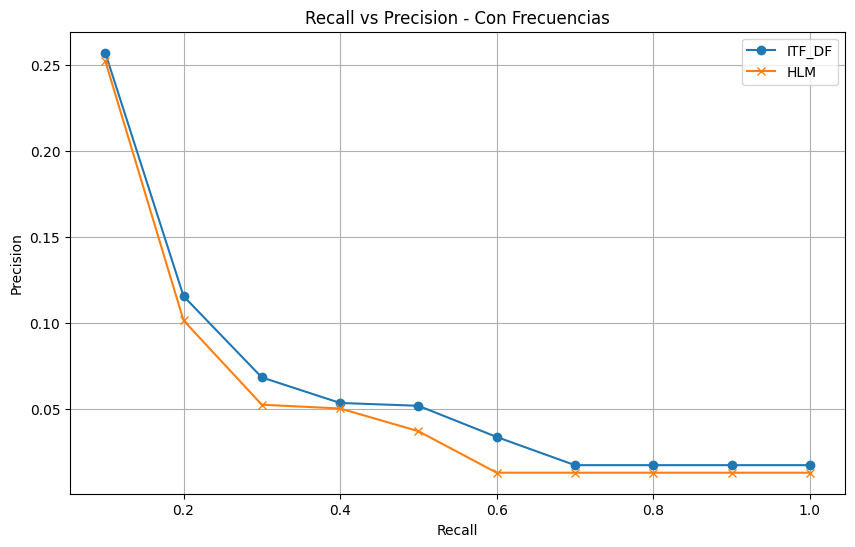

In [30]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos['Recall'], df_11puntos['Precision'], marker='o', linestyle='-', label='ITF_DF')  # Graficar Recall vs Precision
plt.plot(df_11puntos_hlm['Recall'], df_11puntos_hlm['Precision'], marker='x', linestyle='-', label='HLM')  # Graficar Recall vs Precision
plt.title('Recall vs Precision - Con Frecuencias')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.legend()
plt.show()  # Mostrar el gráfico

In [39]:
## Queries sin Frec

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_tfidf_sin_frecs = pt.Experiment(
    [tf_idf],
    queries_sin_frec,
    qrels,
    eval_metrics=eval_metrics,
    names=["TF_IDF"]
)
resultados_tfidf_sin_frecs

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,TF_IDF,76.0,760.0,3114.0,188.0,0.051594,0.081551,0.098546,0.491479,0.516056,...,0.003289,0.273684,0.247368,0.164912,0.123684,0.082456,0.024737,0.012368,0.004947,0.002474


In [16]:
resultados_hlm_sin_frec = pt.Experiment(
    [hlm],
    queries_sin_frec,
    qrels,
    eval_metrics=eval_metrics,
    names=["Hiemstra_LM"]
)
resultados_hlm_sin_frec

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,Hiemstra_LM,76.0,760.0,3114.0,170.0,0.0474,0.072339,0.109072,0.430362,0.459722,...,0.003509,0.257895,0.223684,0.149123,0.111842,0.074561,0.022368,0.011184,0.004474,0.002237


In [17]:
# Mostrar Tabla de P@X
tabla_hlm = resultados_hlm_sin_frec.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla_hlm

,P@X,Value
0,P_5,0.257895
1,P_10,0.223684
2,P_15,0.149123
3,P_20,0.111842
4,P_30,0.074561
5,P_100,0.022368
6,P_200,0.011184
7,P_500,0.004474
8,P_1000,0.002237


In [41]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_sin_frec = resultados_tfidf_sin_frecs.melt(value_vars=["iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_sin_frec['Recall'] = df_11puntos_sin_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_sin_frec

,Recall,Precision
0,0.1,0.141599
1,0.2,0.056662
2,0.3,0.031642
3,0.4,0.019737
4,0.5,0.013158
5,0.6,0.010808
6,0.7,0.003289
7,0.8,0.003289
8,0.9,0.003289
9,1.0,0.003289


In [18]:
df_11puntos_hlm_sin_frec = resultados_hlm_sin_frec.melt(value_vars=["iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_hlm_sin_frec['Recall'] = df_11puntos_hlm_sin_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_hlm_sin_frec

,Recall,Precision
0,0.1,0.127778
1,0.2,0.049708
2,0.3,0.024196
3,0.4,0.021272
4,0.5,0.021272
5,0.6,0.011732
6,0.7,0.011732
7,0.8,0.011732
8,0.9,0.003509
9,1.0,0.003509


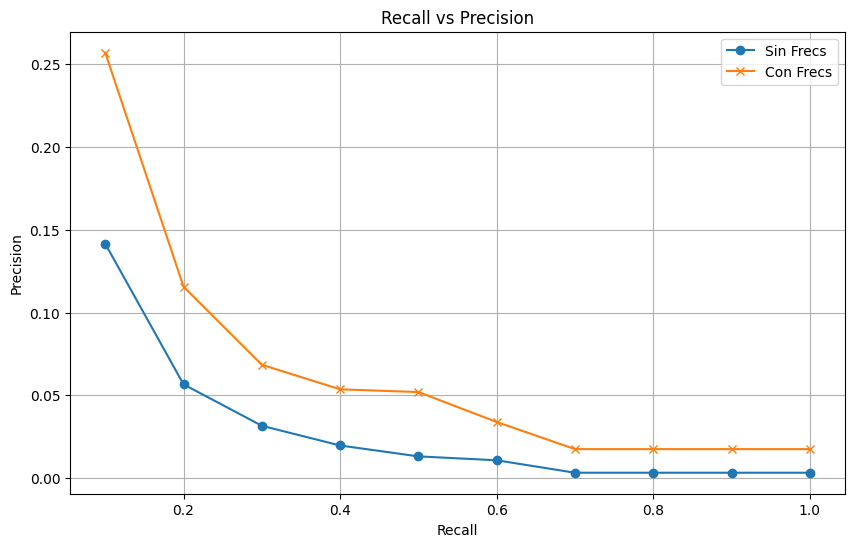

In [42]:
# Crear el gráfico de líneas para ITF-DF
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos_sin_frec['Recall'], df_11puntos_sin_frec['Precision'], marker='o', linestyle='-', label='Sin Frecs')  # Graficar la primera línea
plt.plot(df_11puntos['Recall'], df_11puntos['Precision'], marker='x', linestyle='-', label='Con Frecs')  # Graficar la segunda línea
plt.title('Recall vs Precision')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar el gráfico

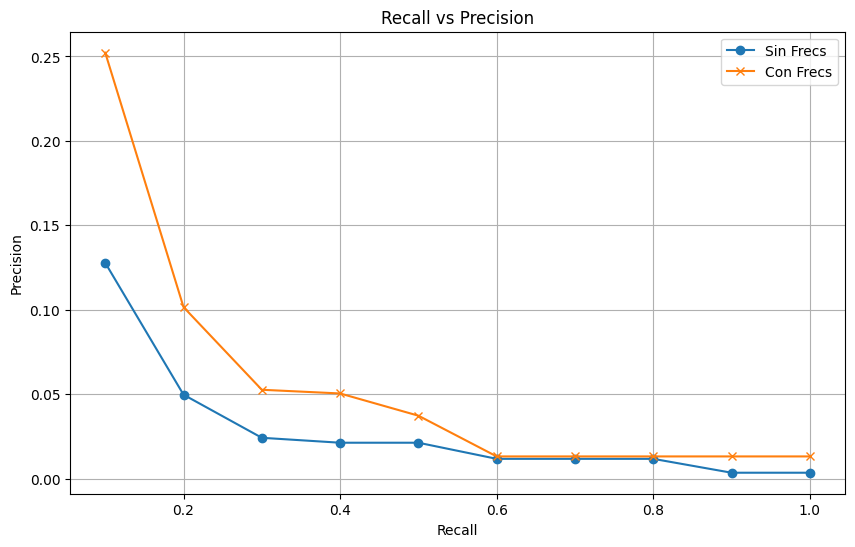

In [19]:
# Crear el gráfico de líneas para HLM
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos_hlm_sin_frec['Recall'], df_11puntos_hlm_sin_frec['Precision'], marker='o', linestyle='-', label='Sin Frecs')  # Graficar la primera línea
plt.plot(df_11puntos_hlm['Recall'], df_11puntos_hlm['Precision'], marker='x', linestyle='-', label='Con Frecs')  # Graficar la segunda línea
plt.title('Recall vs Precision HLM')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar el gráfico